<a href="https://colab.research.google.com/github/anisbagwan/unsupervised-learning-on-iris-dataset/blob/main/Unsupervised_Learning_on_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using unsupervised ML

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

## Let's begin our journy.....

## Importing Libraries and dataset

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSF-Iris/Iris.csv')

## Taking a look at dataset and cleansing it...

Let's check our dataset...

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


This dataset have:
* Columns : 5
* Rows : 150
-----------------------------------------------------------------------------------

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset.

--------------------------------------------------------------------------------------

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The outliers are not present in our dataset.

-------------------------------------------------------------------------------------

Now our data is almost clean, we are ready to do further operations.

---------------------------------------------------------------------------------------

## Let's do Exploratory Data Analysis....

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


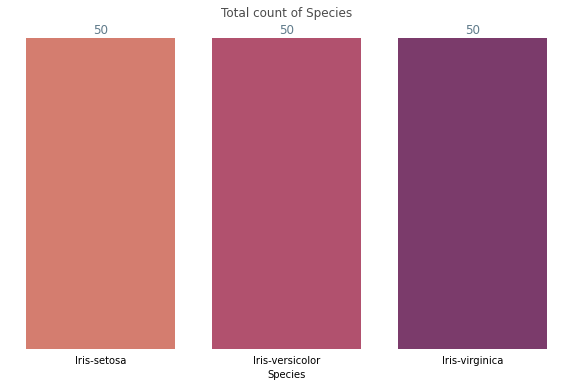

In [9]:
# Let's check the count of Species feature
plt.figure(figsize=(10,6))
plt.grid(False)

# Plotting the values in dependent variable
ax=sns.countplot(df['Species'],palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Species", ylabel = "")
plt.title('Total count of Species',alpha=0.7)


plt.show()

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Text(0.5, 1.0, 'Relation between SepalLengthCm and SepalWidthCm with respect to Species')

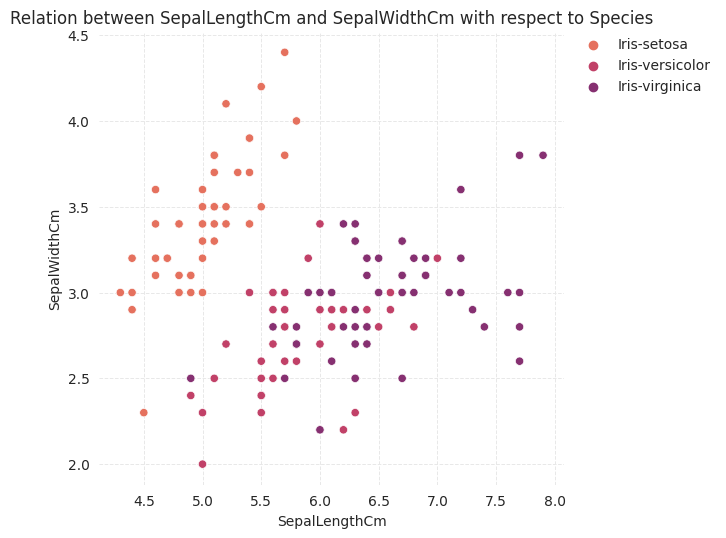

In [11]:
# Plotting relation between battery power and ram of mobiles with Price range
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")

sns.scatterplot(data=df, x = df['SepalLengthCm'], y = 'SepalWidthCm', hue='Species', 
            palette='flare')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
plt.title('Relation between SepalLengthCm and SepalWidthCm with respect to Species')

Text(0.5, 1.0, 'Relation between PetalLengthCm and PetalWidthCm with respect to Species')

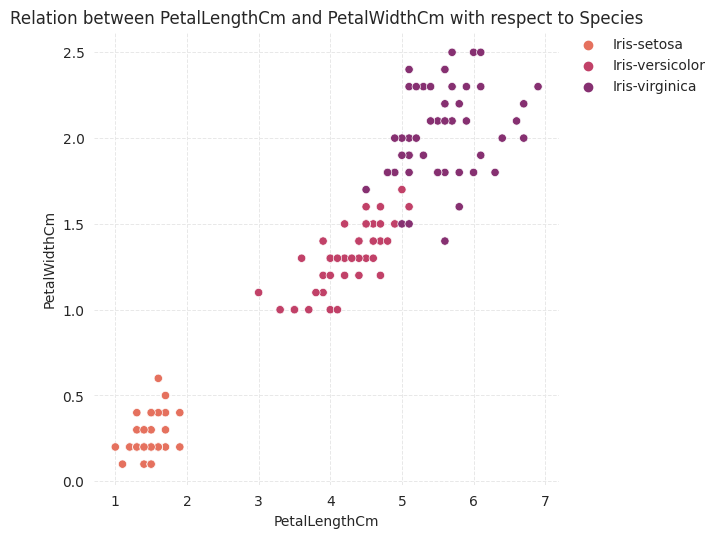

In [12]:
# Plotting relation between PetalLengthCm and PetalWidthCm with respect to Species
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")

sns.scatterplot(data=df, x = df['PetalLengthCm'], y = 'PetalWidthCm', hue='Species', 
            palette='flare')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
plt.title('Relation between PetalLengthCm and PetalWidthCm with respect to Species')

* From above two insights we can say that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above.

------------------------------------------------------------------------------------


But our mission was finding the Labels that we didn't knew at all, So Let's create a suitable scenario.

## Adjusting the Dataset for Unsupervised Learning

Let's remove the labels of columns as we don't need them.

In [13]:
new_df= df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [14]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now we don't know the real labels like 'Iris-Setosa','Iris-Versicolor','Iris-Virginica'.

-----------------------------------------------------------------------------------------

## Let's impliment K-Means Clustering here...

In [15]:
from sklearn.cluster import KMeans

But first of all we need to find best amount of clusters to apply.

So let's plot Elbow curve here.

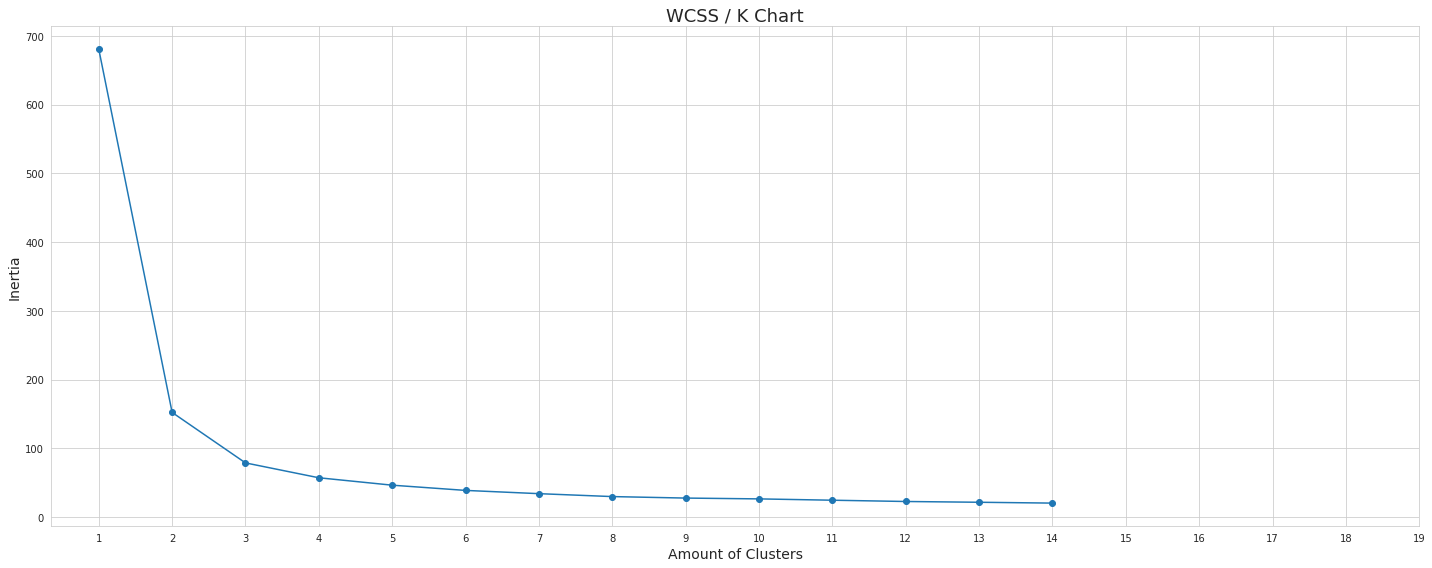

In [16]:
list_1 = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df)
    list_1.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),list_1,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()

From above plot we can say 2 or 3 clusters may give the best clusters by Elbow rule.

-------------------------------------------------------------------------------------

Let's check 2,3,4 and 5 to find optimum number of clusters.

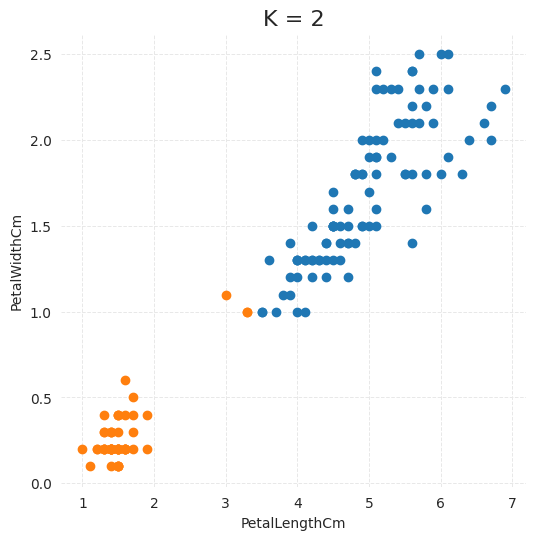

In [17]:
# Let's check for 2 clusters
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")

#Applying K-means
kmeans = KMeans(n_clusters=2)
new_df["labels"] = kmeans.fit_predict(new_df)
plt.scatter(new_df.PetalLengthCm[new_df.labels == 0],new_df.PetalWidthCm[new_df.labels == 0])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 1],new_df.PetalWidthCm[new_df.labels == 1])

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.show()


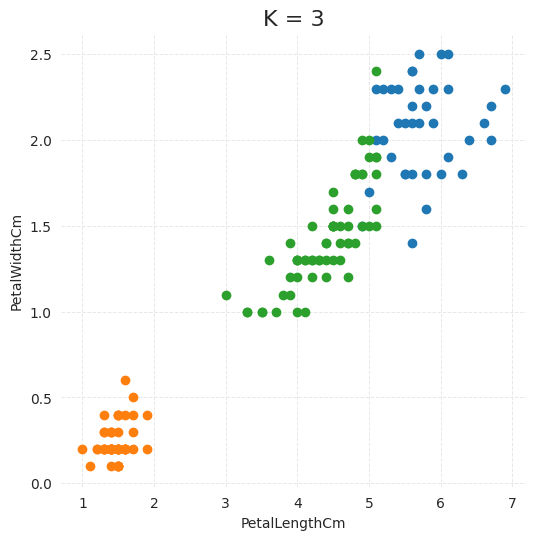

In [18]:
# Let's check for 3 clusters
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")

#Applying K-means
kmeans = KMeans(n_clusters=3)
new_df["labels"] = kmeans.fit_predict(new_df)
plt.scatter(new_df.PetalLengthCm[new_df.labels == 0],new_df.PetalWidthCm[new_df.labels == 0])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 1],new_df.PetalWidthCm[new_df.labels == 1])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 2],new_df.PetalWidthCm[new_df.labels == 2])


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.show()


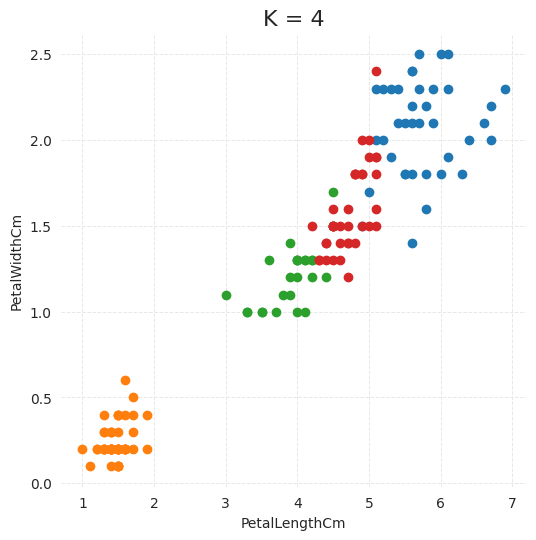

In [19]:
# Let's check for 4 clusters
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")

#Applying K-means
kmeans = KMeans(n_clusters=4)
new_df["labels"] = kmeans.fit_predict(new_df)
plt.scatter(new_df.PetalLengthCm[new_df.labels == 0],new_df.PetalWidthCm[new_df.labels == 0])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 1],new_df.PetalWidthCm[new_df.labels == 1])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 2],new_df.PetalWidthCm[new_df.labels == 2])
plt.scatter(new_df.PetalLengthCm[new_df.labels == 3],new_df.PetalWidthCm[new_df.labels == 3])

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.show()


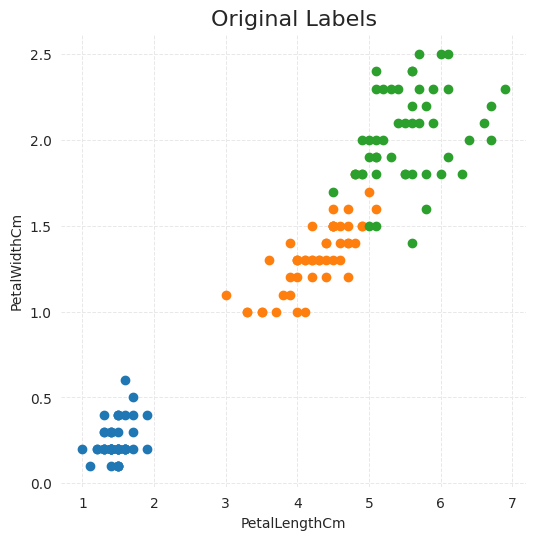

In [20]:

# Let's check for original clusters
plt.figure(figsize=(6,6), dpi=100)
sns.set_style("whitegrid")


plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.show()


## Conclusion:

Kmeans visibly did an amazing job with 3 clusters. Except few data points, I can say prediction is identical to the original with labels. Which shows that our ELBOW chart was right.
And the optimum number of clusters are 'three'.

Thank You.....